In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t


MARTINS BRAGA Arthur
Yuri

#### PART 1 - CROSS-SECTION DATA

In [3]:
df = pd.read_csv('textfiles/HPRICE2.raw', delim_whitespace=True, header=None, names=[
                 'price', 'crime', 'nox', 'rooms', 'dist', 'radial', 'proptax', 'stratio', 'lowstat', 'lprice', 'lnox', 'lproptax'])
df.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators
   are unbiased.

The unobserved variable has a zero mean

Conditional mean = unconditional mean

X and u are uncorrelated

$$
E(u|X) = E(u) = 0
$$

2. Show that under this assumption the OLS estimators are indeed unbiased.

3. Explain the sample selection bias with an example from the course.

4. Explain the omitted variable bias with an example from the course


5. Explain the problem of multicollinearity. Is it a problem in this dataset?


**6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%**

In [4]:
low, high = df['nox'].quantile([0.25, 0.75])
df['nox_level'] = pd.cut(df['nox'], bins=[df['nox'].min(), low, high, df['nox'].max()], labels=['low', 'medium', 'high'], include_lowest=True)
df.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_level
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,medium
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,medium
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938,medium
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678,medium
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678,medium


**7. Compute for each category of nox level the average median price and comment on your results**

In [5]:
grouped = df.groupby('nox_level')
average_prices = grouped['price'].mean()
print(average_prices)

nox_level
low       26977.093750
medium    22741.555118
high      17430.653226
Name: price, dtype: float64


| NOx Level | Value |
| --------- | ----- |
| Low       | 26977.09 |
| Medium    | 22741.567 |
| High      | 17430.65 |

These values suggest a descending trend in average median prices as the NOx level increases. This could indicate a negative correlation between NOx levels and housing prices.

**8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect?**

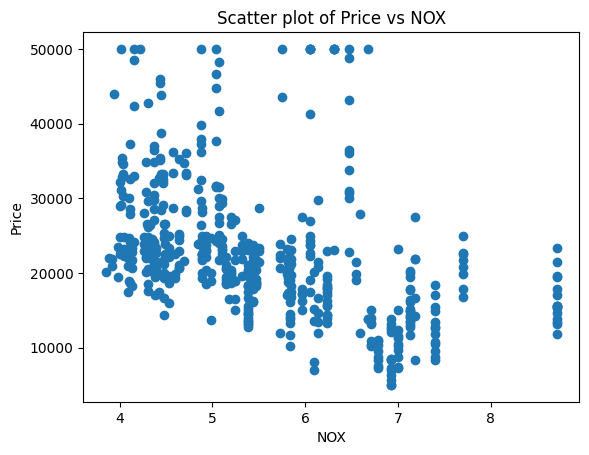

In [6]:
plt.scatter(df['nox'], df['price'])
plt.xlabel('NOX')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs NOX')
plt.show()

When analyzing the graph, it is possible to observe that the average prices increase as NOx levels rise. However, it cannot be asserted that this is a ceteris paribus effect because we do not know if the other variables are held constant, and a scatter plot alone is not sufficient. Moreover, it is possible to see that there are different prices for the same NOx level, indicating the likely presence of other variables influencing the price, which are therefore not constant.

**9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.06e-91
Time:                        17:44:14   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

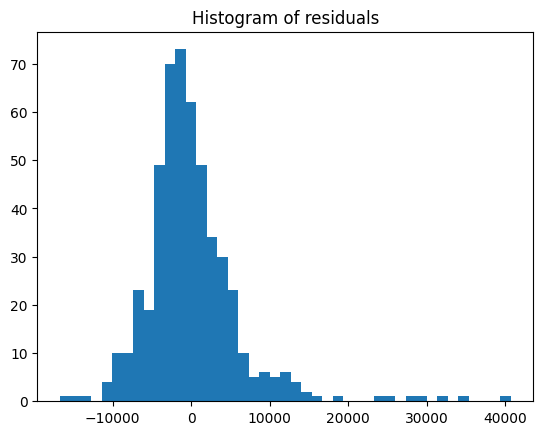

In [7]:
X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

plt.hist(results.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()

The OLS regression results show that all the variables (crime, nox, rooms, proptax) are statistically significant to the price variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, nox, and proptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

**10. Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          2.50e-101
Time:                        17:44:15   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

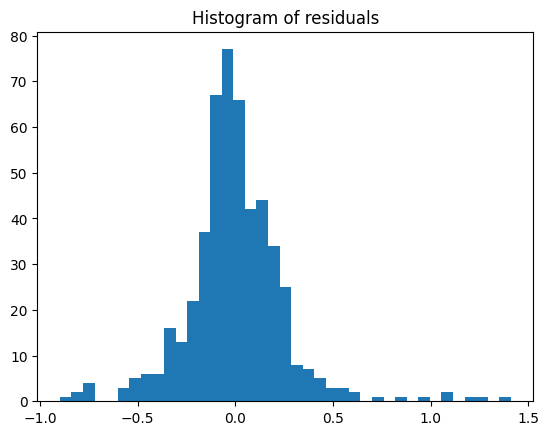

In [8]:
X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results10 = model.fit()
print(results10.summary())

plt.hist(results10.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()

The OLS regression results show that all the variables (crime, nox, rooms, proptax) are statistically significant to lprice variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, nox, and proptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

Comparing with the results of the previous model, the coefficients are smaller in this model. And the R-squared is higher in this model, which means that this model fits better than the previous one.

**11. Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients.**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.77e-101
Time:                        18:33:25   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

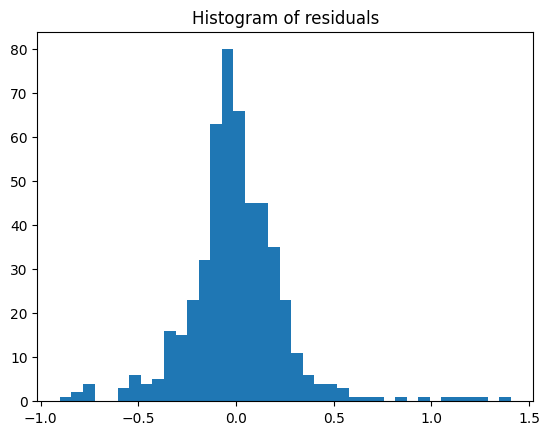

In [10]:
X = df[['crime', 'lnox', 'rooms', 'lproptax']]
y = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results11 = model.fit()
print(results11.summary())

plt.hist(results11.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()

The OLS regression results show that all the variables (crime, lnox, rooms, lproptax) are statistically significant to lprice variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, lnox, and lproptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

The R-squared is a little bit higher than the previous model, which means that this model fits better than the previous one.

**12. In the specification of question 10, test the hypothesis $H_0:\beta_{\text{nox}} <0$ vs. $H_1: \beta_{\text{nox}} > 0$ at the 1% level**


In [41]:
p_value = results10.pvalues['nox']

print('The p-value for the coefficient on NOX is', p_value)

if p_value < 0.01:
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

We reject the null hypothesis at the 1% level.


**13.  In the specification of question 10, test the hypothesis $H_0:\beta_{\text{nox}} = 0$ vs. $H_1: \beta_{\text{nox}} \neq 0$ at the 1% level using the p-value of the test**


In [11]:
p_value = results10.pvalues['nox']

print('The p-value for the coefficient on NOX is', p_value)

if p_value < 0.01:
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

We reject the null hypothesis at the 1% level.


**14.  In the specification of question 10, test the hypothesis $H_0: \beta_{\text{crime}} = \beta_{\text{proptax}}$ at the 10% level**

In [48]:
hypotheses = '(crime = proptax)'

f_test = results10.f_test(hypotheses)

print('The p-value for the F-test is', f_test.pvalue.item())

if f_test.pvalue < 0.10:
  print("We reject the null hypothesis at the 10% level.")
else:
  print("We do not reject the null hypothesis at the 10% level.")

We reject the null hypothesis at the 10% level.


**15. In the specification of question 10, test the hypothesis $H_0: \beta_{\text{nox}} = 0, \, \beta_{\text{proptax}} = 0$ at the 10% level**
    

In [12]:
hypotheses = '(nox = 0), (proptax = 0)'

f_test = results10.f_test(hypotheses)

if f_test.pvalue < 0.10:
    print("We reject the null hypothesis at the 10% level.")
else:
    print("We do not reject the null hypothesis at the 10% level.")

We reject the null hypothesis at the 10% level.


**16.  In the specification of question 10, test the hypothesis $H_0: \beta_{\text{nox}} = -500, \, \beta_{\text{proptax}} = -100$ at the 10% level using the p-value of the test**

In [13]:
hypotheses = '(nox = -500), (proptax = -100)'

f_test = results10.f_test(hypotheses)

if f_test.pvalue < 0.10:
  print("We reject the null hypothesis at the 10% level.")
else:
  print("We do not reject the null hypothesis at the 10% level.")

We reject the null hypothesis at the 10% level.


**17. In the specification of question 10, test the hypothesis $H_0: \beta_{\text{nox}} + \beta_{\text{proptax}} = -1000$ at the 10% level using the p-value of the test**

In [14]:
hypotheses = '(nox + proptax = -1000)'

f_test = results10.f_test(hypotheses)

if f_test.pvalue < 0.10:
    print("We reject the null hypothesis at the 10% level.")
else:
    print("We do not reject the null hypothesis at the 10% level.")

We reject the null hypothesis at the 10% level.


**18. In the specification of question 10, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of nox.**

In [23]:
df_low = df[df['nox_level'] == 'low']
df_med_high = df[df['nox_level'] != 'low']

X_low = df_low[['crime', 'nox', 'rooms', 'proptax']]
y_low = df_low['lprice']

X_med_high = df_med_high[['crime', 'nox', 'rooms', 'proptax']]
y_med_high = df_med_high['lprice']

X_low = sm.add_constant(X_low)
X_med_high = sm.add_constant(X_med_high)

model_low = sm.OLS(y_low, X_low)
results_low = model_low.fit()

model_med_high = sm.OLS(y_med_high, X_med_high)
results_med_high = model_med_high.fit()

def hypothesis_test(model_low, model_high, alpha=0.1):
    # Get the coefficient estimates and standard errors from both models
    coef_low = model_low.params
    se_low = model_low.bse

    coef_high = model_high.params
    se_high = model_high.bse

    # Calculate the t-statistic for the difference in coefficients
    t_statistic = (coef_high - coef_low) / ((se_high**2 + se_low**2)**0.5)

    # Calculate degrees of freedom
    df = len(model_low.params)

    # Calculate p-values
    p_values = 2 * (1 - t.cdf(abs(t_statistic), df))

    # Display results
    results = pd.DataFrame({'t_statistic': t_statistic, 'p_value': p_values}, index=model_low.params.index)
    results['significant'] = results['p_value'] < alpha

    return results

# Perform the hypothesis test
results_hypothesis_test = hypothesis_test(results_low, results_med_high)

# Display results
print("\nHypothesis Test Results:")
print(results_hypothesis_test)

Coefficients for low levels:
const      7.650538
crime     -0.105771
nox       -0.006234
rooms      0.405795
proptax   -0.003573
dtype: float64

Coefficients for medium and high levels:
const      8.883016
crime     -0.012800
nox       -0.052477
rooms      0.249811
proptax   -0.004267
dtype: float64

Are the coefficients equal?
const      False
crime      False
nox        False
rooms      False
proptax    False
dtype: bool

Hypothesis Test Results:
         t_statistic   p_value  significant
const       3.815693  0.012428         True
crime       0.643800  0.548069        False
nox        -0.796245  0.462003        False
rooms      -5.953513  0.001911         True
proptax    -0.358041  0.734932        False


**19. Repeat the test of question 18 but now assuming that only the coefficients of nox and
proptax can change between the two groups of observations. State and test $H_0$.**

In [22]:
df_low = df[df['nox_level'] == 'low']
df_med_high = df[df['nox_level'] != 'low']

X_low = df_low[['crime', 'nox', 'rooms', 'proptax']]
y_low = df_low['lprice']

X_med_high = df_med_high[['crime', 'nox', 'rooms', 'proptax']]
y_med_high = df_med_high['lprice']

X_low = sm.add_constant(X_low)
X_med_high = sm.add_constant(X_med_high)

model_low = sm.OLS(y_low, X_low)
results_low = model_low.fit()

model_med_high = sm.OLS(y_med_high, X_med_high)
results_med_high = model_med_high.fit()

# Get the coefficients
coeff_low = results_low.params
coeff_med_high = results_med_high.params

# Print the coefficients
print("Coefficients for low levels:")
print(coeff_low)
print("\nCoefficients for medium and high levels:")
print(coeff_med_high)

# Compare the coefficients
equal_coeffs = coeff_low == coeff_med_high
print("\nAre the coefficients equal?")
print(equal_coeffs)

def hypothesis_test(model_low, model_high, alpha=0.1):
    # Get the coefficient estimates and standard errors from both models
    coef_low = model_low.params
    se_low = model_low.bse

    coef_high = model_high.params
    se_high = model_high.bse

    # Calculate the t-statistic for the difference in coefficients
    t_statistic = (coef_high - coef_low) / ((se_high**2 + se_low**2)**0.5)

    # Calculate degrees of freedom
    df = len(model_low.params)

    # Calculate p-values
    p_values = 2 * (1 - t.cdf(abs(t_statistic), df))

    # Display results
    results = pd.DataFrame({'t_statistic': t_statistic, 'p_value': p_values}, index=model_low.params.index)
    results['significant'] = results['p_value'] < alpha

    return results

# Perform the hypothesis test
results_hypothesis_test = hypothesis_test(results_low, results_med_high)

# Display results
print("\nHypothesis Test Results:")
print(results_hypothesis_test)



Coefficients for low levels:
const      7.650538
crime     -0.105771
nox       -0.006234
rooms      0.405795
proptax   -0.003573
dtype: float64

Coefficients for medium and high levels:
const      8.883016
crime     -0.012800
nox       -0.052477
rooms      0.249811
proptax   -0.004267
dtype: float64

Are the coefficients equal?
const      False
crime      False
nox        False
rooms      False
proptax    False
dtype: bool

Hypothesis Test Results:
         t_statistic   p_value  significant
const       3.815693  0.012428         True
crime       0.643800  0.548069        False
nox        -0.796245  0.462003        False
rooms      -5.953513  0.001911         True
proptax    -0.358041  0.734932        False


#### PART 2 - HETEROSKEDASTICITY

**20. Explain the problem of heteroskedasticity with an example of the course.**

The Heteroskedasticity problem arises when $Var(u|x)$ depends on $x$, indicating nonconstant variance. Since $Var(u|x) = Var(y|x)$, heteroskedasticity is present whenever $Var(y|x)$ is a function of $x$.

We can visualize this problem with the example provided in the course, where we examine the relationship between education and wage. If, when creating the model, we assume homoskedasticity—that is, the variance of the error term is constant across all levels of education—we will encounter a problem. This is because when we analyze the real world, we can imagine that when a person has a higher education level, they will have more and distinct opportunities for work, and therefore, their wage will be more variable. On the other hand, a person with a lower education level will have fewer opportunities for work, and therefore, their wage will be less variable.

Therefore, we can conclude that if we assume homoskedasticity, we will introduce bias into our model.

**21. Suppose that $E(u u') = \sigma^2\Omega$. Show that the GLS estimator is the best linear unbiased estimator.**

22. Show that the GLS estimator is the best linear unbiased estimator.

1.  In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^2$ on constant, crime, nox, rooms, proptax, test $H_0: \delta_{\text{crime}}, \delta_{\text{nox}}, \delta_{\text{rooms}}, \delta_{\text{proptax}} = 0$, where the coefficients $\delta_k$ (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.


In [31]:
X = df[['crime', 'nox', 'rooms', 'proptax']]

X = sm.add_constant(X)

u=results10.resid
u2=u**2
y=u2
model=sm.OLS(y,X)
results = model.fit()

f_statistic = results.fvalue

if (f_statistic > 1):
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")


print("="*78)
print(results.summary())


We reject the null hypothesis at the 1% level.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.98
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           8.33e-14
Time:                        16:42:39   Log-Likelihood:                 185.10
No. Observations:                 506   AIC:                            -360.2
Df Residuals:                     501   BIC:                            -339.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

23. In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form


In [34]:
X = df[['crime', 'lnox', 'rooms', 'lproptax']]
X = sm.add_constant(X)

u=results11.resid
u2=u**2
y=u2
model=sm.OLS(y,X)
results = model.fit()

f_statistic = results.fvalue

if (f_statistic > 1):
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")


print("="*78)
print(results.summary())


We reject the null hypothesis at the 1% level.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     16.51
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.02e-12
Time:                        16:45:10   Log-Likelihood:                 184.66
No. Observations:                 506   AIC:                            -359.3
Df Residuals:                     501   BIC:                            -338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

24. In the specification of question 12, test the hypothesis of no heteroskedasticity of linear form


25. Comment on the differences between your results of questions 22,23, 24.


26. Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight.